In [121]:
from skimage.io import imsave, imread
from skimage import transform
import numpy as np
import matplotlib.pyplot as plt

In [63]:
N = 1262
M = 64
foo = np.zeros((N, N))
foo[1,1] = 1000

factor = 1.0*N/M

red = pyramid_reduce(foo, (factor), mode='constant')
red [red > 0]

array([ 0.73346745])

In [165]:
def get_points_matrix(points, shape):
    """
    Возвращает по точкам записанным в строку "изображение", с которым будем работать при преобразованиях
    :type shape: tuple[int, int]
    :type points: List[float]
    :param points:
    :return: numpy.ndarray
    """
    res = np.zeros(shape, dtype=np.uint8)

    for x, y in zip(points[::2], points[1::2]):
        res[np.uint8(y), np.uint8(x)] = 255

    return res

In [493]:
girl = imread('public_data/00_input/train/images/00000.jpg')
with open('public_data/00_input/train/gt.csv') as f:
    next(f)
    girl_dots_str = f.readline()
    girl_dots = list(map(int, girl_dots_str.split(',')[1:]))
    

In [544]:
print(girl_dots)


[51, 51, 127, 60, 169, 65, 203, 52, 68, 77, 85, 75, 110, 82, 160, 87, 171, 79, 193, 84, 156, 144, 92, 174, 140, 180, 168, 179]


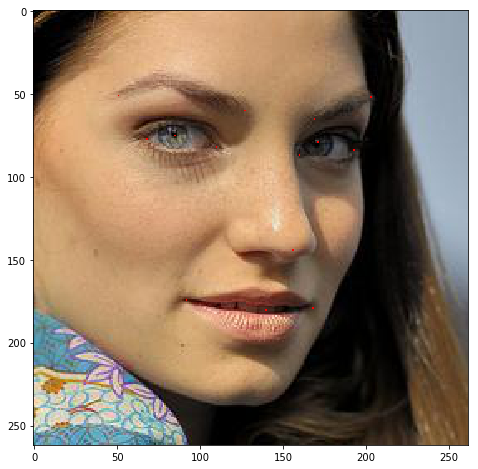

In [497]:
dots = get_points_matrix(girl_dots, girl.shape[:2])

i_girl = girl.copy()

girl[...,0][dots > 0] = 255 
girl[...,1:][dots > 0] =0

plt.figure(figsize=(8,8))
# plt.imshow(foo, cmap=plt.cm.gray_r)
plt.imshow(girl)
# plt.imshow(dots, cmap=plt.cm.autumn)
plt.show()

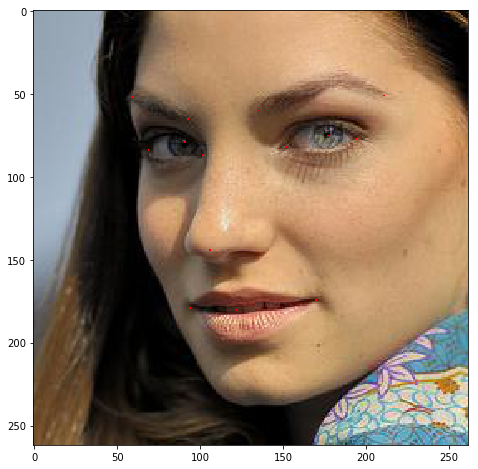

In [542]:
f_dots = np.array(girl_dots)
f_dots[::2] = i_girl.shape[0] - f_dots[::2]
# f_dots = get_points_matrix(f_dots, i_girl.shape[:2])
f_dots = np.array([f_dots[::2], f_dots[1::2]])

f_girl = i_girl[:, ::-1].copy()
f_girl = f_girl.copy()
f_girl[..., 0][f_dots[1], f_dots[0]] = 255
f_girl[..., 1:][f_dots[1], f_dots[0]] = 0

plt.figure(figsize=(8,8))
plt.imshow(f_girl)
plt.show();

/Users/bykhovtsev/anaconda/envs/py3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


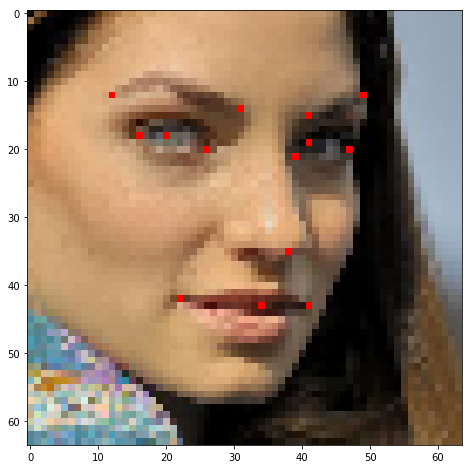

In [540]:
s_girl = transform.resize(i_girl, (64, 64))
factor = 1.0 * 64 / i_girl.shape[0] 
s_dots = [d * factor for d in girl_dots]
s_dots = get_points_matrix(s_dots, s_girl.shape[:2])

s_girl[...,0][s_dots > 0] = 1
s_girl[...,1:][s_dots > 0] = 0

plt.figure(figsize=(8,8))
plt.imshow(s_girl)
plt.show()

/Users/bykhovtsev/anaconda/envs/py3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


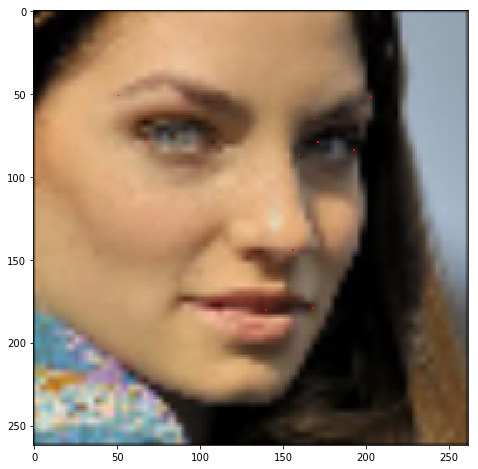

((array([ 51,  52,  60,  65,  75,  77,  79,  82,  84,  87, 144, 174, 179, 180]),
  array([ 51, 203, 127, 169,  85,  68, 171, 110, 193, 160, 156,  92, 168, 140])),
 (array([12, 12, 14, 15, 18, 18, 19, 20, 20, 21, 35, 42, 43, 43]),
  array([12, 49, 31, 41, 16, 20, 41, 26, 47, 39, 38, 22, 34, 41])))

In [439]:
ss_girl = transform.resize(transform.resize(i_girl, (64,64)), (262,262))
factor = 1.0 * i_girl.shape[0] / 64
ss_dots = [d * factor for d in [d / factor for d in girl_dots]]
ss_dots = get_points_matrix(ss_dots, ss_girl.shape[:2])

ss_girl[...,0][ss_dots > 0] = 1
ss_girl[...,1:][ss_dots > 0] = 0

plt.figure(figsize=(8,8))
plt.imshow(ss_girl)
plt.show()

np.where(ss_dots > 0), np.where(s_dots > 0)

In [419]:
def rotate(x,y,angle, shape):
    __x = 1.0 * np.int32(x) - shape[1] // 2 + 0.5
    __y = 1.0 * np.int32(y) - shape[0] // 2 + 0.5

    _x =  np.cos(np.radians(angle)) * __x + np.sin(np.radians(angle)) * __y + shape[1] // 2 - 0.5
    _y = -np.sin(np.radians(angle)) * __x + np.cos(np.radians(angle)) * __y + shape[0] // 2 - 0.5
    
    return [_x, _y]
    
r_dots = []
for x, y in zip(girl_dots[::2], girl_dots[1::2]):
    r_dots.extend(rotate(x,y, 10, i_girl.shape))
    

r_dots = get_points_matrix(r_dots, i_girl.shape[:2])

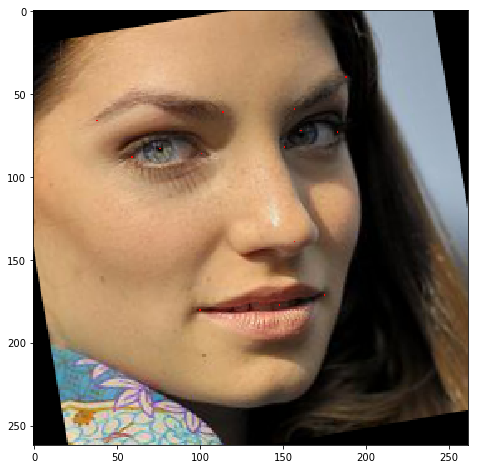

In [420]:
r_girl = transform.rotate(i_girl, 10)

r_girl[...,0][r_dots > 0] = 1
r_girl[...,1:][r_dots > 0] = 0

plt.figure(figsize=(8,8))
plt.imshow(r_girl)
plt.show()

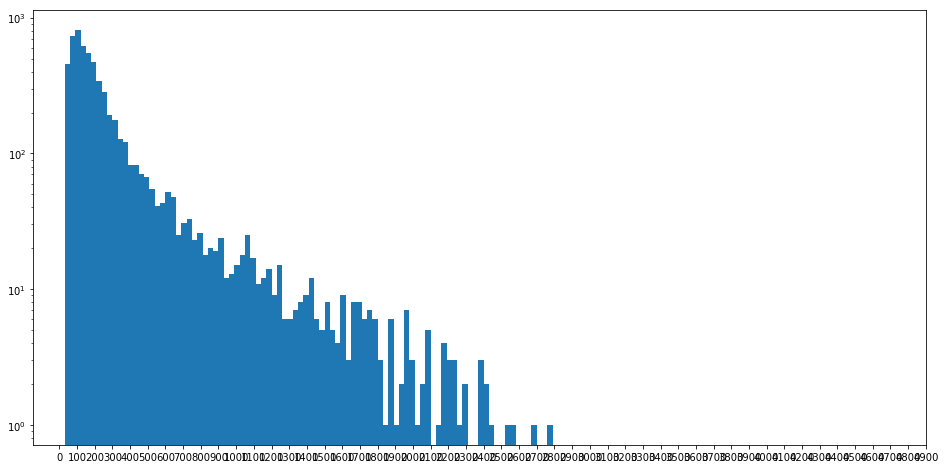

In [573]:
with open('./public_data/00_gt/img_shapes.csv') as fshapes:
    next(fshapes)
    arr = []
    for i, line in enumerate(fshapes):
        coords = line.split(',')[1:]
        arr.append([int(coords[0]), int(coords[1])])
        
arr = np.array(arr)
np.where((128 > arr) & (arr > 64))[0].shape, np.where((arr < 64))[0].shape, arr.shape
plt.figure(figsize=(16,8))
plt.hist(np.max(arr, axis=1), bins=np.arange(0, 3000, 30), log=True)
plt.xticks(np.arange(0, 5000, 100))
plt.show()

In [531]:
bue_girl.shape
util.pad(bue_girl, ((1,), (1,), (0,)), 'edge').shape

(354, 292, 3)

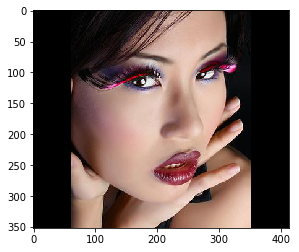

In [535]:
from skimage import util

bue_girl = imread('./public_data/00_input/train/images/00036.jpg')
r = bue_girl.shape[0]
c = bue_girl.shape[1]

padded_bue = util.pad(bue_girl, ((max(0, c-r),), (max(0, r-c),), (0,)), 'constant')
plt.imshow(padded_bue)
#                         (max(0, r-c)), (max(0, c-r))

plt.show()

/Users/bykhovtsev/anaconda/envs/py3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


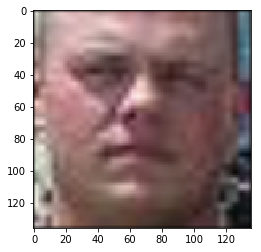

In [561]:
foo = bue_girl = imread('./public_data/00_input/train/images/04330.jpg')
plt.imshow(rescale(foo, 4))
plt.show()

In [630]:
def read_csv(filename):
    """

    :rtype: dict[str, list[float]]
    :param filename:
    :return:
    """
    res = {}
    with open(filename) as fhandle:
        next(fhandle)
        i=0
        for line in fhandle:
            parts = line.rstrip('\n').split(',')
            coords = np.array([float(x) for x in parts[1:]], dtype='float64')
            res[parts[0]] = coords
#             if i > 3:
#                 break
            i+=1
    return res

In [ ]:
csv = read_csv('./public_data/00_input/train/gt.csv')

In [635]:
from os.path import abspath, dirname, join
def read_train(y, train_img_dir):
    """

    :type y: dict
    """
    train = np.zeros((64,64,3,len(y)))
    test = np.zeros((len(y), 28))
    for i, img_name in enumerate(y.keys()):
        try:
            train[..., i] =imread(join(train_img_dir, img_name), as_grey=False)
            test[i] = np.array(y[img_name])
        except: 
            print(i, img_name)
            raise 'ouch'
        
    return test, train

In [631]:
imgdir = './__temp'
y = read_csv('./__temp.csv')

In [636]:
test, train = read_train(y, imgdir)

294 00294.jpg


TypeError: exceptions must derive from BaseException

In [625]:
foo = train[..., 3]
np.all(foo == )

True

In [628]:
imread(join(imgdir,'00003.jpg'))

array([[[ 89,  66,  72],
        [ 56,  35,  40],
        [ 46,  31,  34],
        ..., 
        [226, 244, 244],
        [206, 232, 233],
        [212, 240, 241]],

       [[ 90,  69,  74],
        [ 61,  42,  46],
        [ 32,  17,  20],
        ..., 
        [217, 227, 228],
        [214, 229, 232],
        [225, 244, 248]],

       [[ 81,  62,  68],
        [ 62,  45,  51],
        [ 27,  15,  17],
        ..., 
        [186, 184, 187],
        [240, 241, 246],
        [219, 222, 227]],

       ..., 
       [[120,  99,  70],
        [159, 135, 107],
        [173, 145, 121],
        ..., 
        [232, 235, 254],
        [232, 235, 254],
        [233, 236, 255]],

       [[ 90,  71,  41],
        [160, 139, 110],
        [143, 117,  90],
        ..., 
        [232, 235, 254],
        [232, 235, 254],
        [233, 236, 255]],

       [[ 92,  73,  43],
        [119,  98,  69],
        [176, 150, 123],
        ..., 
        [232, 235, 254],
        [232, 235, 254],
        [233, 236,

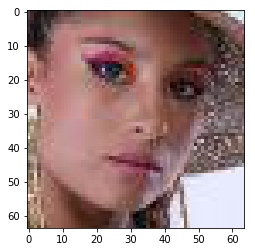

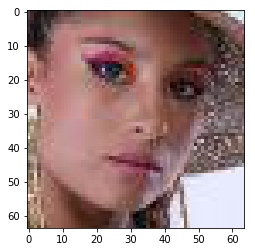

In [629]:
plt.imshow(imread(join(imgdir,'00003.jpg')))
plt.show()
plt.imshow(train[..., 3].astype(np.uint8))
plt.show()

In [574]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 64, 64)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.compile(optimizer='rmsprop', loss='mse')

h = model.fit_generator(
    train_datagen.flow_from_directory('./__temp'),
    steps_per_epoch=20,
    epochs=50,
    validation_data=test_datagen.flow_from_directory('./public_data/00_input/test/images', target_size=(64, 64)),
    validation_steps=10)

model.save_weights('first_try.h5')